In [1]:
import pdb
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import random

In [2]:
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h, s, l = random.choice([(188, 72, 53), (253, 63, 56), (12, 78, 69)])#三个颜色的字体
    return "hsl({}, {}%, {}%)".format(h, s, l)

与 资本 不 资本家 毫无关系 评论 容易 引战 删除 都 狗头 举报 不 动 规矩 狗头 完全 对 国家 污蔑 一种 不负责任 说法 带有 强烈 主观 色彩 没有 明确 引战 意思 人身攻击 up主 侮辱 up主 劳动成果 嘿此 一票 投给 独立 之 思想 自由 之 精神 请 不要 跟 投 谢谢 只是 一个 人 不想 玩 就要 其他人 也 不 去 玩 无论如何 都 蛮 过分 人 只是 个 标题 女主 不是 放电 妹 么 难道 举报者 没 看过 原作 小说 发表 个人 意见 完全 没 毛病 语气 没 问题 后续 言论 也 没有 嘲讽 阴阳怪气 之类 正常 言论 言语 过激 容易 引战 删除 抖


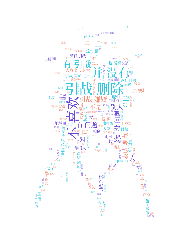

In [3]:
if __name__ == '__main__':
    filename = 'Bilibili_Blackroom_Spider/dataset/pre_dataset.csv'
    data = open(filename, encoding='utf-8').readlines()
    count = 0
#     pdb.set_trace()
    valtext = []
    for item in data:
        count += 1
        if count == 1: continue
        else:
            tmp = item.replace('\n','')
            valtext.append(tmp.split(',')[1])
#     print(valtext)
    
    words_str = ''.join(valtext)
    print(words_str[0:300])
    background_Image = np.array(Image.open('Bilibili_Blackroom_Spider/images and fonts/2.jpg'))
    
    wc = WordCloud(
        background_color='white',
        mask=background_Image,
        font_path=r'Bilibili_Blackroom_Spider/images and fonts/SourceHanSerifCN-Medium.otf',
        color_func=random_color_func,
        random_state=50,
    )
    word_cloud = wc.generate(words_str) # 产生词云
    word_cloud.to_file("Bilibili_Blackroom_Spider/images and fonts/rm.jpg") #保存图片
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

In [7]:
import csv
import random
import numpy as np
import pandas as pd

# Choose randomly for each type of ratio 31000:3000:6000 and sum of data is 120000.
def third_test_choose(type1, type2, type4):
    random_list_1 = random.sample(range(0, len(type1)),40000)
    random_list_2 = random.sample(range(0, len(type2)),40000)
    random_list_4 = random.sample(range(0, len(type4)),40000)
    random_strlist_1 = ['a' + str(i) for i in random_list_1]
    random_strlist_2 = ['b' + str(i) for i in random_list_2]
    random_strlist_4 = ['c' + str(i) for i in random_list_4]

    list_93000 = []
    list_9000 = []
    list_18000 = []

    list_93000[:31000] = random_strlist_1[:31000]
    list_93000[31000:62000] = random_strlist_2[:31000]
    list_93000[62000:93000] =  random_strlist_4[:31000]

    list_9000[:3000] = random_strlist_1[31000:34000]
    list_9000[3000:6000] = random_strlist_2[31000:34000]
    list_9000[6000:9000] = random_strlist_4[31000:34000]

    list_18000[:6000] = random_strlist_1[34000:40000]
    list_18000[6000:12000] = random_strlist_2[34000:40000]
    list_18000[12000:18000] = random_strlist_4[34000:40000]

    random.shuffle(list_93000)
    random.shuffle(list_9000)
    random.shuffle(list_18000)

    train_list = []
    val_list = []
    test_list = []

    for item in list_93000:
        if item[0] == 'a': train_list.append(type1[int(item[1:])])
        if item[0] == 'b': train_list.append(type2[int(item[1:])])
        if item[0] == 'c': train_list.append(type4[int(item[1:])])

    for item in list_9000:
        if item[0] == 'a': val_list.append(type1[int(item[1:])])
        if item[0] == 'b': val_list.append(type2[int(item[1:])])
        if item[0] == 'c': val_list.append(type4[int(item[1:])])

    for item in list_18000:
        if item[0] == 'a': test_list.append(type1[int(item[1:])])
        if item[0] == 'b': test_list.append(type2[int(item[1:])])
        if item[0] == 'c': test_list.append(type4[int(item[1:])])

    fieldnames = ['opid', 'vote', 'content', 'cid']


    train_dict_list = []
    for data in train_list:
        train_dict = dict.fromkeys(('opid', 'vote', 'content', 'cid'))
        data = data.replace('\n', '').replace('\r', '')
        tmp = data.split(',')
        train_dict.update({'opid' : tmp[0], 'vote': tmp[1], 'content' : tmp[2], 'cid': tmp[3]})
        train_dict_list.append(train_dict)

    val_dict_list = []
    for data in val_list:
        val_dict = dict.fromkeys(('opid', 'vote', 'content', 'cid'))
        data = data.replace('\n', '').replace('\r', '')
        tmp = data.split(',')
        val_dict.update({'opid': tmp[0], 'vote': tmp[1], 'content': tmp[2], 'cid': tmp[3]})
        val_dict_list.append(val_dict)

    test_dict_list = []
    for data in test_list:
        test_dict = dict.fromkeys(('opid', 'vote', 'content', 'cid'))
        data = data.replace('\n', '').replace('\r', '')
        tmp = data.split(',')
        test_dict.update({'opid': tmp[0], 'vote': tmp[1], 'content': tmp[2], 'cid': tmp[3]})
        test_dict_list.append(test_dict)

    writer1 = pd.DataFrame(columns = fieldnames, data = train_dict_list)
    writer1.to_csv('../dataset/spider_result_1/train_3.csv', encoding='utf-8', index=False)

    writer2 = pd.DataFrame(columns=fieldnames, data=val_dict_list)
    writer2.to_csv('../dataset/spider_result_1/val_3.csv', encoding='utf-8', index=False)

    writer4 = pd.DataFrame(columns=fieldnames, data=test_dict_list)
    writer4.to_csv('../dataset/spider_result_1/test_3.csv', encoding='utf-8', index=False)

# Choose randomly for each type of ratio 20000:2000:4000 and sum of data is 78000.
def second_test_choose(type1, type2, type4):
    random_list_1 = random.sample(range(0, len(type1)),26000)
    random_list_2 = random.sample(range(0, len(type2)),26000)
    random_list_4 = random.sample(range(0, len(type4)),26000)
    random_strlist_1 = ['a' + str(i) for i in random_list_1]
    random_strlist_2 = ['b' + str(i) for i in random_list_2]
    random_strlist_4 = ['c' + str(i) for i in random_list_4]

    list_60000 = []
    list_6000 = []
    list_12000 = []

    list_60000[:20000] = random_strlist_1[:20000]
    list_60000[20000:40000] = random_strlist_2[:20000]
    list_60000[40000:60000] =  random_strlist_4[:20000]

    list_6000[:2000] = random_strlist_1[20000:22000]
    list_6000[2000:4000] = random_strlist_2[20000:22000]
    list_6000[4000:6000] = random_strlist_4[20000:22000]

    list_12000[:4000] = random_strlist_1[22000:26000]
    list_12000[4000:8000] = random_strlist_2[22000:26000]
    list_12000[8000:12000] = random_strlist_4[22000:26000]

    random.shuffle(list_60000)
    random.shuffle(list_6000)
    random.shuffle(list_12000)

    train_list = []
    val_list = []
    test_list = []

    for item in list_60000:
        if item[0] == 'a': train_list.append(type1[int(item[1:])])
        if item[0] == 'b': train_list.append(type2[int(item[1:])])
        if item[0] == 'c': train_list.append(type4[int(item[1:])])

    for item in list_6000:
        if item[0] == 'a': val_list.append(type1[int(item[1:])])
        if item[0] == 'b': val_list.append(type2[int(item[1:])])
        if item[0] == 'c': val_list.append(type4[int(item[1:])])

    for item in list_12000:
        if item[0] == 'a': test_list.append(type1[int(item[1:])])
        if item[0] == 'b': test_list.append(type2[int(item[1:])])
        if item[0] == 'c': test_list.append(type4[int(item[1:])])

    fieldnames = ['opid', 'vote', 'content', 'cid']


    train_dict_list = []
    for data in train_list:
        train_dict = dict.fromkeys(('opid', 'vote', 'content', 'cid'))
        data = data.replace('\n', '').replace('\r', '')
        tmp = data.split(',')
        train_dict.update({'opid' : tmp[0], 'vote': tmp[1], 'content' : tmp[2], 'cid': tmp[3]})
        train_dict_list.append(train_dict)

    val_dict_list = []
    for data in val_list:
        val_dict = dict.fromkeys(('opid', 'vote', 'content', 'cid'))
        data = data.replace('\n', '').replace('\r', '')
        tmp = data.split(',')
        val_dict.update({'opid': tmp[0], 'vote': tmp[1], 'content': tmp[2], 'cid': tmp[3]})
        val_dict_list.append(val_dict)

    test_dict_list = []
    for data in test_list:
        test_dict = dict.fromkeys(('opid', 'vote', 'content', 'cid'))
        data = data.replace('\n', '').replace('\r', '')
        tmp = data.split(',')
        test_dict.update({'opid': tmp[0], 'vote': tmp[1], 'content': tmp[2], 'cid': tmp[3]})
        test_dict_list.append(test_dict)

    writer1 = pd.DataFrame(columns = fieldnames, data = train_dict_list)
    writer1.to_csv('../dataset/spider_result_1/train_2.csv', encoding='utf-8', index=False)

    writer2 = pd.DataFrame(columns=fieldnames, data=val_dict_list)
    writer2.to_csv('../dataset/spider_result_1/val_2.csv', encoding='utf-8', index=False)

    writer4 = pd.DataFrame(columns=fieldnames, data=test_dict_list)
    writer4.to_csv('../dataset/spider_result_1/test_2.csv', encoding='utf-8', index=False)
    
# Choose randomly for each type of ratio 2000:200:400 and sum of data is 7800.
def first_test_choose(type1, type2, type4):
    random_list_1 = random.sample(range(0, len(type1)),2600)
    random_list_2 = random.sample(range(0, len(type2)),2600)
    random_list_4 = random.sample(range(0, len(type4)),2600)
    random_strlist_1 = ['a' + str(i) for i in random_list_1]
    random_strlist_2 = ['b' + str(i) for i in random_list_2]
    random_strlist_4 = ['c' + str(i) for i in random_list_4]

    list_6000 = []
    list_600 = []
    list_1200 = []

    list_6000[:2000] = random_strlist_1[:2000]
    list_6000[2000:4000] = random_strlist_2[:2000]
    list_6000[4000:6000] =  random_strlist_4[:2000]

    list_600[:200] = random_strlist_1[2000:2200]
    list_600[200:400] = random_strlist_2[2000:2200]
    list_600[400:600] = random_strlist_4[2000:2200]

    list_1200[:400] = random_strlist_1[2200:2600]
    list_1200[400:8000] = random_strlist_2[2200:2600]
    list_1200[800:1200] = random_strlist_4[2200:2600]

    random.shuffle(list_6000)
    random.shuffle(list_600)
    random.shuffle(list_1200)

    train_list = []
    val_list = []
    test_list = []

    for item in list_6000:
        if item[0] == 'a': train_list.append(type1[int(item[1:])])
        if item[0] == 'b': train_list.append(type2[int(item[1:])])
        if item[0] == 'c': train_list.append(type4[int(item[1:])])

    for item in list_600:
        if item[0] == 'a': val_list.append(type1[int(item[1:])])
        if item[0] == 'b': val_list.append(type2[int(item[1:])])
        if item[0] == 'c': val_list.append(type4[int(item[1:])])

    for item in list_1200:
        if item[0] == 'a': test_list.append(type1[int(item[1:])])
        if item[0] == 'b': test_list.append(type2[int(item[1:])])
        if item[0] == 'c': test_list.append(type4[int(item[1:])])

    fieldnames = ['opid', 'vote', 'content', 'cid']


    train_dict_list = []
    for data in train_list:
        train_dict = dict.fromkeys(('opid', 'vote', 'content', 'cid'))
        data = data.replace('\n', '').replace('\r', '')
        tmp = data.split(',')
        train_dict.update({'opid' : tmp[0], 'vote': tmp[1], 'content' : tmp[2], 'cid': tmp[3]})
        train_dict_list.append(train_dict)

    val_dict_list = []
    for data in val_list:
        val_dict = dict.fromkeys(('opid', 'vote', 'content', 'cid'))
        data = data.replace('\n', '').replace('\r', '')
        tmp = data.split(',')
        val_dict.update({'opid': tmp[0], 'vote': tmp[1], 'content': tmp[2], 'cid': tmp[3]})
        val_dict_list.append(val_dict)

    test_dict_list = []
    for data in test_list:
        test_dict = dict.fromkeys(('opid', 'vote', 'content', 'cid'))
        data = data.replace('\n', '').replace('\r', '')
        tmp = data.split(',')
        test_dict.update({'opid': tmp[0], 'vote': tmp[1], 'content': tmp[2], 'cid': tmp[3]})
        test_dict_list.append(test_dict)

    writer1 = pd.DataFrame(columns = fieldnames, data = train_dict_list)
    writer1.to_csv('../dataset/spider_result_1/train_1.csv', encoding='utf-8', index=False)

    writer2 = pd.DataFrame(columns=fieldnames, data=val_dict_list)
    writer2.to_csv('../dataset/spider_result_1/val_1.csv', encoding='utf-8', index=False)

    writer4 = pd.DataFrame(columns=fieldnames, data=test_dict_list)
    writer4.to_csv('../dataset/spider_result_1/test_1.csv', encoding='utf-8', index=False)

if __name__ == '__main__':
    filename1 = '../dataset/divide_type/1type_3.csv'
    filename2 = '../dataset/divide_type/2type_3.csv'
    filename4 = '../dataset/divide_type/4type_3.csv'
    type1 = open(filename1, encoding='utf-8').readlines()
    type2 = open(filename2, encoding='utf-8').readlines()
    type4 = open(filename4, encoding='utf-8').readlines()
    del type1[0]
    del type2[0]
    del type4[0]
    third_test_choose(type1, type2, type4)


In [16]:
import pandas as pd

if __name__ == '__main__':
    filename = input('请输入需要删除信息的文件名') #../dataset/spider_result_1/train_1.csv, test:spider_6/695703-696300.csv
    reader = pd.read_csv(filename, encoding='utf-8')
    reader.drop(['cid'],axis=1,inplace=True)
    reader.drop(['opid'],axis=1,inplace=True)
    reader.to_csv('../dataset/test_3/test.csv', index = False)
    # print(reader)

请输入需要删除信息的文件名../dataset/spider_result_1/test_3.csv


In [ ]:
import pandas as pd

In [31]:
if __name__ == '__main__':
    train_df = pd.read_csv('../dataset/test_1/train.csv', sep = ',', header = None, names = ['label','text'])
    train_df.drop(0,inplace = True)
    val_df = pd.read_csv('../dataset/test_1/val.csv', sep = ',', header = None, names = ['label','text'])
    val_df.drop(0,inplace = True)
    test_df = pd.read_csv('../dataset/test_1/test.csv', sep = ',', header = None, names = ['label','text'])
    test_df.drop(0,inplace = True)
#     stop_words = open('../dataset/stopwords.txt',mode='r', encoding = 'utf-8')
    stop_words = pd.read_csv('../dataset/stopwords.txt', header = None, names = ['text'], error_bad_lines=False, engine='python', encoding = 'utf-8')
    stop_words.to_csv('../dataset/stopwords.csv',sep='\t')

Skipping line 1804: unexpected end of data
Skipping line 138: Expected 1 fields in line 138, saw 2
Skipping line 681: Expected 1 fields in line 681, saw 2


In [1]:
import jieba
from tqdm import tqdm
import pandas as pd
import os

# jieba.load_userdict("../dataset/1000000-dict.txt")

"去除指定无用的符号"
puncts = [' ', '，']
def clean_text(x):
    x = x.strip()
    for punct in puncts:
        x = x.replace(punct,'')
    return x

"让文本只保留汉字、英文和数字"
def is_chinese_alphabet_number(xchar):
    if (xchar >= u'\u4e00' and xchar <= u'\u9fa5') or (xchar >= u'\u0041' and xchar <= u'\u005a') or (xchar >= u'\u0061' and xchar <= u'\u007a'):
        return True
    else:
        return False
"将汉字、英文和数字保留下来"
def keep_text(x):
    out_str=''
    for i in x:
        if not is_chinese_alphabet_number(i):
            out_str = out_str+i
        else:
            out_str = out_str+' '
    return out_str

def seg_sentence(sentence,stopwords):
    "对句子进行分词和去除停用词"
    jieba.load_userdict("../dataset/user_dict.txt")
    sentence_lower = sentence.lower()
    sentence_seged = jieba.cut(sentence_lower, cut_all=False)
    outstr=''
    for word in sentence_seged:
        if word not in stopwords:
                outstr+=word
                outstr+=" "
    return outstr

def build_vocab(sentences,verbose=True):
    "追踪训练词汇表，遍历所有文本对单词进行计数"
    vocab={}
    for sentence in tqdm(sentences,disable=(not verbose)):
        for word in sentence.split():
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1

    return vocab

# def texts_to_sequences(sentences,vocab,verbose=True):
#     seq_sentences=[]
#     unk_vec=np.random.random(embed_size)*0.5
#     unk_vec=unk_vec-unk_vec.mean()
#     for sentence in tqdm(sentences,disable=(not verbose)):
#         seq_sentence=[]
#         for word in sentence.split():
#             seq_sentence.append(vocab.get(word,unk_vec))
#         seq_sentences.append(seq_sentence)
#     return seq_sentences

def load_and_prec():
    #文件读取
    dataset = pd.read_csv('pre_dataset.csv')
    #创建自定义词表
    dataset["content"]=dataset["content"].apply(lambda x: clean_text(x))
#     dataset["content"]=dataset["content"].apply(lambda x: keep_text(x))
    #dataset["content"]=dataset["content"].apply(lambda x: seg_sentence(x, stopwords))
    dataset.to_csv('pre_dataset_1.csv', index = False)
    return dataset

if __name__ == '__main__':
    vocab_size = 100
    dataset = load_and_prec()

FileNotFoundError: [Errno 2] File pre_dataset.csv does not exist: 'pre_dataset.csv'